In [1]:
#Import Libraries
# !pip install yellowbrick
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Data
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Pima.csv', 
                 index_col=0)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#Define x and y

In [3]:
x = df.iloc[:,:-1]
y = df['class']

In [4]:
x

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

# Univariate Selection

- We use Chi2 test to perform the feature selection.
- When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. 
- In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [ ]:
#Chi square for feature selection

In [7]:
test = SelectKBest(score_func=chi2, k = 5)

test.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x000001CB5264DDA0>)

In [8]:
x.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [9]:
test.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
pd.DataFrame({
    'Features' : x.columns,
    'Test' : test.scores_
})

,Features,Test
0,preg,111.519691
1,plas,1411.887041
2,pres,17.605373
3,skin,53.108040
4,test,2175.565273
5,mass,127.669343
6,pedi,5.392682
7,age,181.303689


In [15]:
x.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [14]:
pd.DataFrame(test.scores_).T

,0,1,2,3,4,5,6,7
0,111.519691,1411.887041,17.605373,53.10804,2175.565273,127.669343,5.392682,181.303689


In [17]:
univariate = pd.DataFrame(test.scores_).T
univariate
univariate.columns = x.columns
univariate

,preg,plas,pres,skin,test,mass,pedi,age
0,111.519691,1411.887041,17.605373,53.10804,2175.565273,127.669343,5.392682,181.303689


- test
- plasma
- age
- mass

# Recursive Feature Elimination

In [ ]:
#read the data

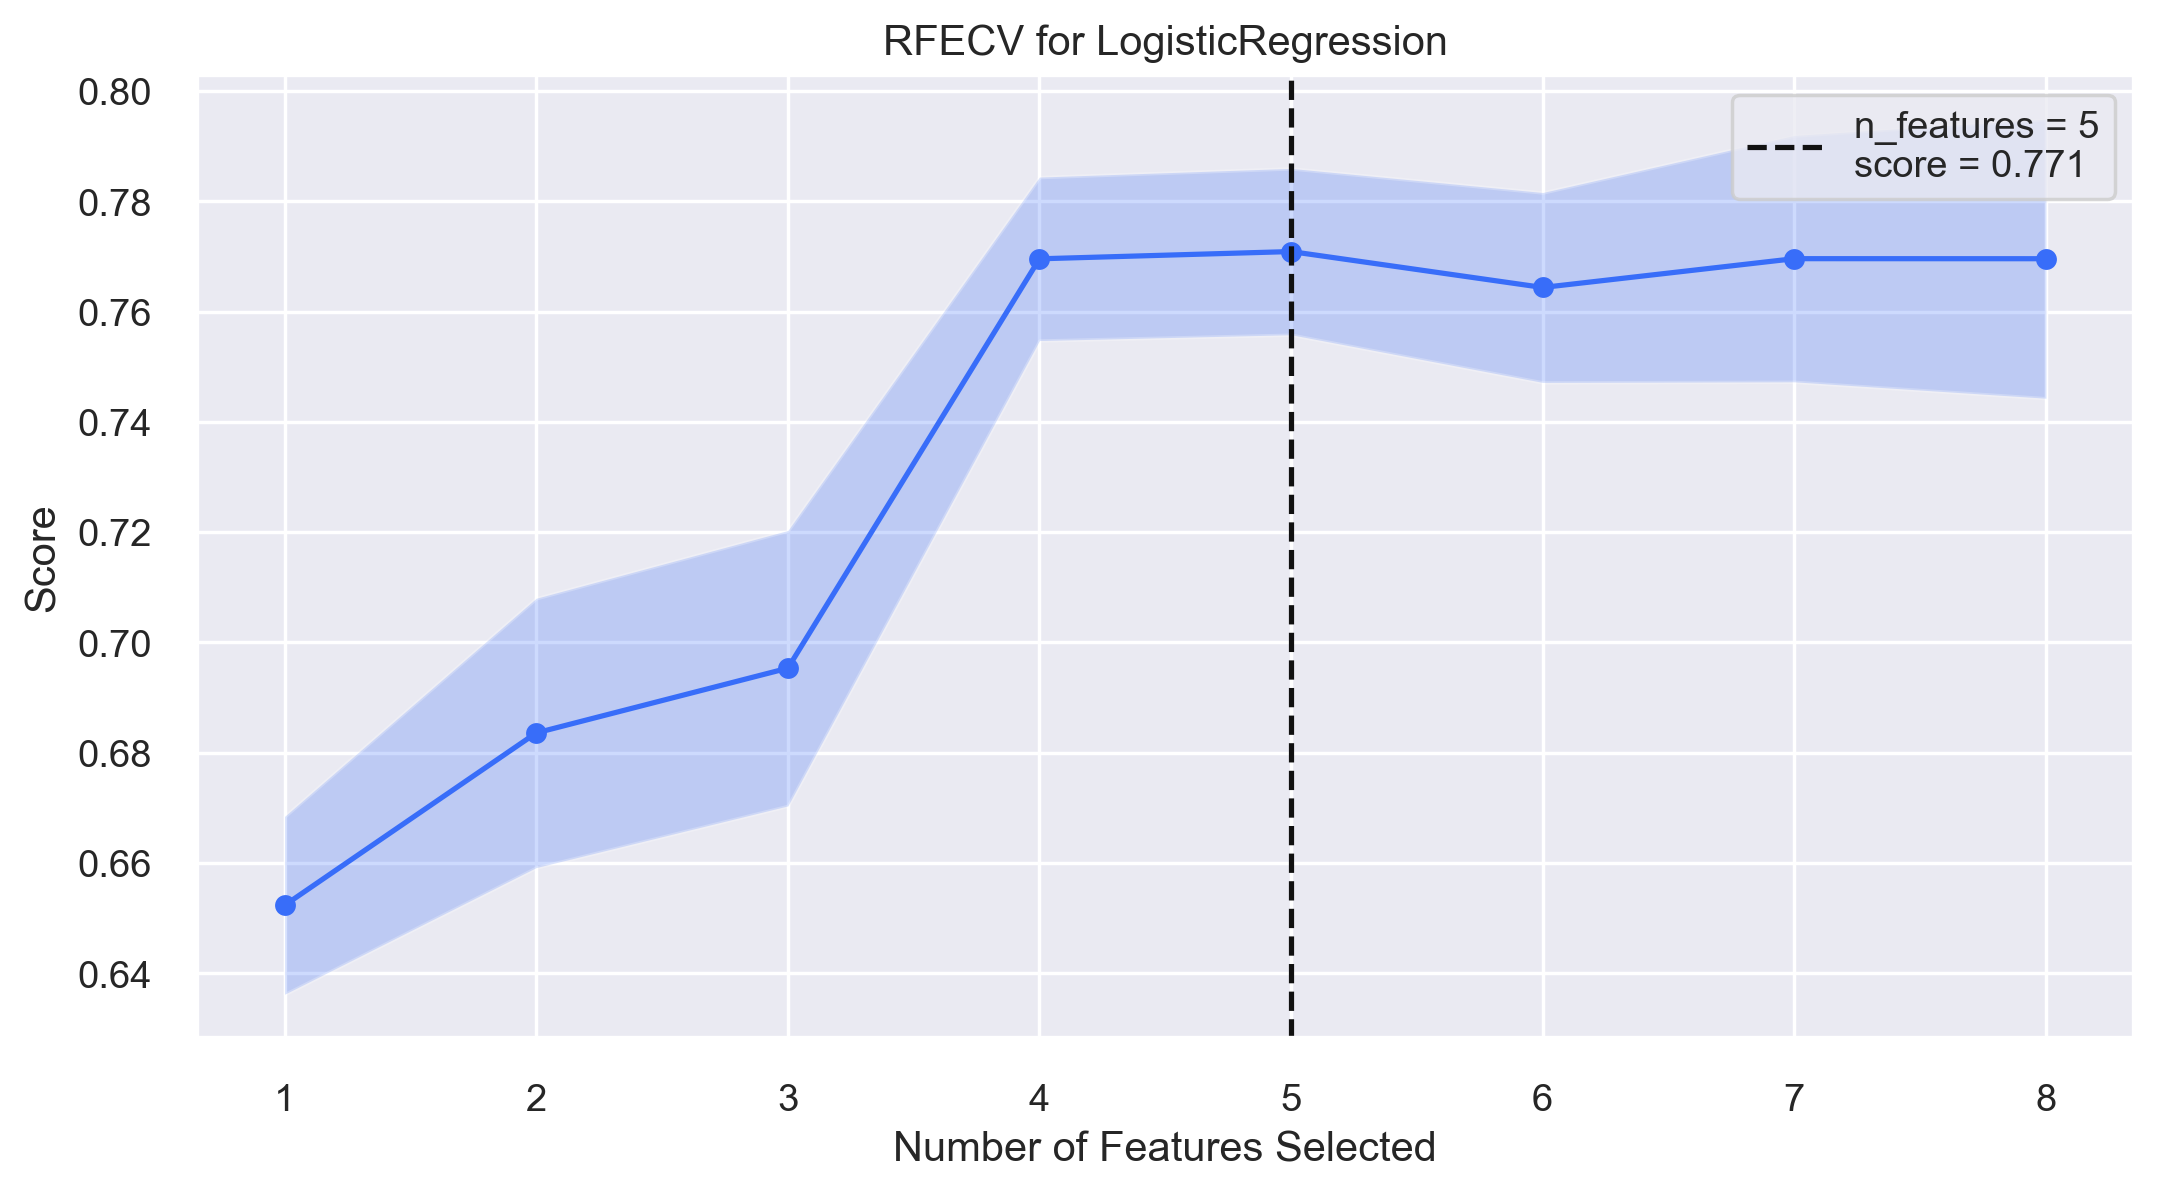

In [18]:
rfe = rfecv(LogisticRegression(),x,y)

In [19]:
rfe.ranking_

array([1, 1, 2, 3, 4, 1, 1, 1])

In [20]:
rfe_Sel = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})

In [21]:
rfe_Sel

,Ranking,Features
0,1,preg
1,1,plas
2,2,pres
3,3,skin
4,4,test
5,1,mass
6,1,pedi
7,1,age


In [22]:
rfe_Sel[rfe_Sel['Ranking']==1]

,Ranking,Features
0,1,preg
1,1,plas
5,1,mass
6,1,pedi
7,1,age


# Tree Based method

In [ ]:
#Tree Based method

In [23]:
dt = DecisionTreeClassifier()

dt.fit(x,y)

DecisionTreeClassifier()

In [24]:
dt.feature_importances_

array([0.05847604, 0.3258382 , 0.10628184, 0.0239799 , 0.02882659,
       0.22049002, 0.1262903 , 0.1098171 ])

In [25]:
ig_sel = pd.DataFrame({
    'IG': dt.feature_importances_,
    'Features' : x.columns
})

In [26]:
ig_sel

,IG,Features
0,0.058476,preg
1,0.325838,plas
2,0.106282,pres
3,0.023980,skin
4,0.028827,test
5,0.220490,mass
6,0.126290,pedi
7,0.109817,age


In [27]:
ig_sel.sort_values(by='IG', ascending=False)

,IG,Features
1,0.325838,plas
5,0.220490,mass
6,0.126290,pedi
7,0.109817,age
2,0.106282,pres
0,0.058476,preg
4,0.028827,test
3,0.023980,skin


- plasma
- pedi
- mass
- age